In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_set = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data_set

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
data_set.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [4]:
data_set.dtypes

In [5]:
data_set['Date'].value_counts()

<AxesSubplot:>

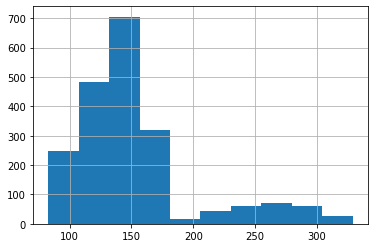

In [6]:
data_set['High'].hist()

<AxesSubplot:>

<Figure size 1440x576 with 0 Axes>

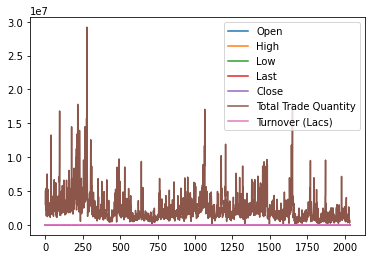

In [7]:
plt.figure(figsize=(20,8))
data_set.plot()

In [8]:
data=data_set.filter(['Close'])
dataset = data_set.values
training_data_len=math.ceil(len(data_set)*8)
training_data_len

16280

In [9]:
dataset

In [10]:
data_set= data_set.iloc[:, 0:5]
data_set

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80
2031,2010-07-26,120.10,121.00,117.10,117.10
2032,2010-07-23,121.80,121.95,120.25,120.35
2033,2010-07-22,120.30,122.00,120.25,120.75


In [11]:
training_set = data_set.iloc[:,1:2].values
training_set

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

data_training_scaled = scaler.fit_transform(training_set)

In [13]:
features_set = []
labels = []
for i in range(60, 586):
    features_set.append(data_training_scaled[i-60:i, 0])
    labels.append(data_training_scaled[i, 0])

In [14]:
features_set, labels = np.array(features_set), np.array(labels)

In [15]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
features_set.shape

(526, 60, 1)

In [16]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [17]:
model = Sequential()

In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
model.fit(features_set, labels, epochs = 30, batch_size = 20)

Epoch 1/30
27/27 [==============================] - 0s 729us/step - loss: 0.0118
Epoch 2/30
27/27 [==============================] - 0s 730us/step - loss: 0.0118
Epoch 3/30
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 4/30
27/27 [==============================] - 0s 764us/step - loss: 0.0118
Epoch 5/30
27/27 [==============================] - 0s 749us/step - loss: 0.0118
Epoch 6/30
27/27 [==============================] - 0s 731us/step - loss: 0.0118
Epoch 7/30
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 8/30
27/27 [==============================] - 0s 910us/step - loss: 0.0118
Epoch 9/30
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 10/30
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 11/30
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 12/30
27/27 [==============================] - 0s 991us/step - loss: 0.0118
Epoch 13/30
27/27 [================

In [21]:
data_testing_complete = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data_testing_processed = data_testing_complete.iloc[:, 1:2]
data_testing_processed

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


In [22]:
data_total = pd.concat((data_set['Open'], data_set['Open']), axis=0)

In [23]:
test_inputs = data_total[len(data_total) - len(data_set) - 60:].values
test_inputs.shape

(2095,)

In [24]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [25]:
test_features = []
for i in range(60, 89):
    test_features.append(test_inputs[i-60:i, 0])

In [26]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
test_features.shape

(29, 60, 1)

In [27]:
predictions = model.predict(test_features)

In [28]:
predictions

array([[[0.20600162],
        [0.21654502],
        [0.21654502],
        ...,
        [0.1650446 ],
        [0.15896188],
        [0.16626115]],

       [[0.21654502],
        [0.21654502],
        [0.2175588 ],
        ...,
        [0.15896188],
        [0.16626115],
        [0.6202352 ]],

       [[0.21654502],
        [0.2175588 ],
        [0.19870235],
        ...,
        [0.16626115],
        [0.6202352 ],
        [0.6222628 ]],

       ...,

       [[0.17092457],
        [0.16788322],
        [0.17477697],
        ...,
        [0.62206   ],
        [0.6455799 ],
        [0.67234385]],

       [[0.16788322],
        [0.17477697],
        [0.16443634],
        ...,
        [0.6455799 ],
        [0.67234385],
        [0.6605839 ]],

       [[0.17477697],
        [0.16443634],
        [0.14557989],
        ...,
        [0.67234385],
        [0.6605839 ],
        [0.64760745]]], dtype=float32)

In [29]:
x_train = data_set[0:1256]
y_train = data_set[1:1257]
print(x_train.shape)
print(y_train.shape)

(1256, 5)
(1256, 5)


In [30]:
x_train

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
1251,2013-09-04,142.00,145.35,140.65,143.60
1252,2013-09-03,144.10,145.20,140.70,141.80
1253,2013-09-02,139.40,144.40,139.35,144.00
1254,2013-08-30,138.10,140.65,136.70,139.20


In [31]:
np.random.seed(1)
np.random.randn(3, 3)

In [32]:
np.random.normal(1)

0.7506296245225899

In [33]:
np.random.normal(5)

6.4621079370449745

In [34]:
np.random.seed(42)
np.random.normal(size = 1000, scale = 100).std()

97.87262077473541

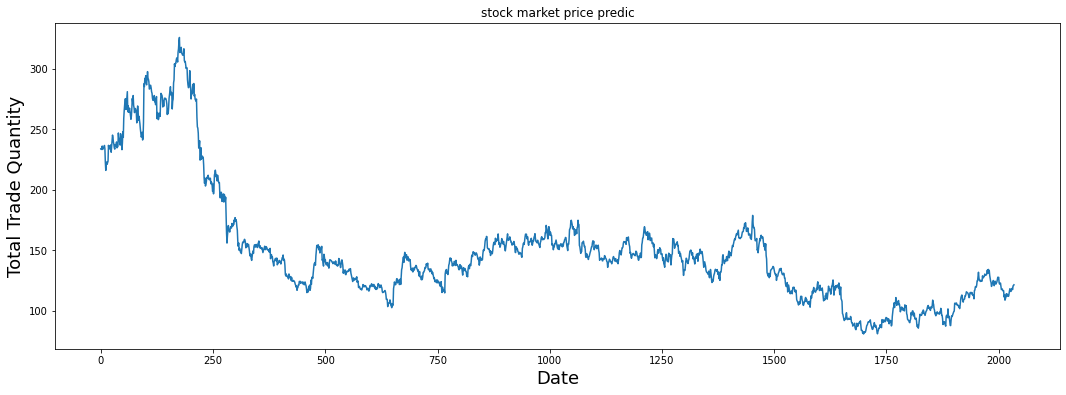

In [35]:
plt.figure(figsize=(18,6))
plt.title("stock market price predic")
plt.plot(data_testing_complete['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()

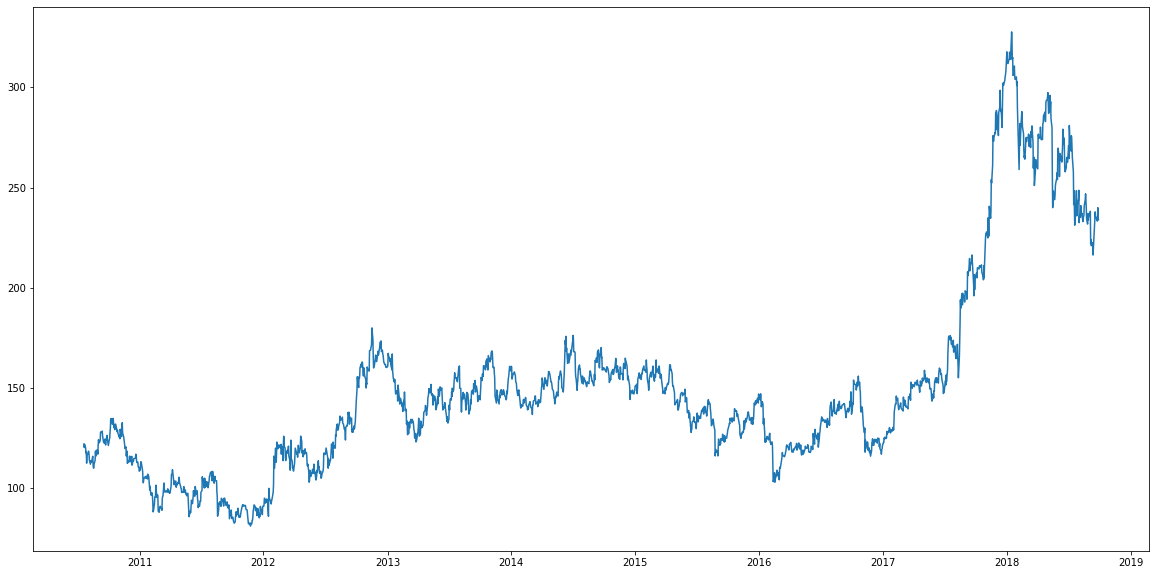

In [36]:
#Analyze the closing prices from dataframe:
data_set["Date"]=pd.to_datetime(data_set.Date)
data_set.index=data_set['Date']
#data_set.head()

plt.figure(figsize=(20,10))
plt.plot(data_set["Open"],label='ClosePriceHist')

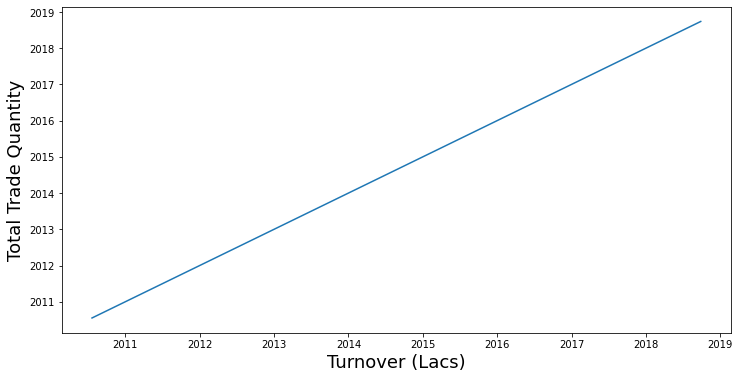

In [37]:
plt.figure(figsize=(12,6))
plt.plot(data_set['Date'])
plt.xlabel('Turnover (Lacs)',fontsize=18)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()

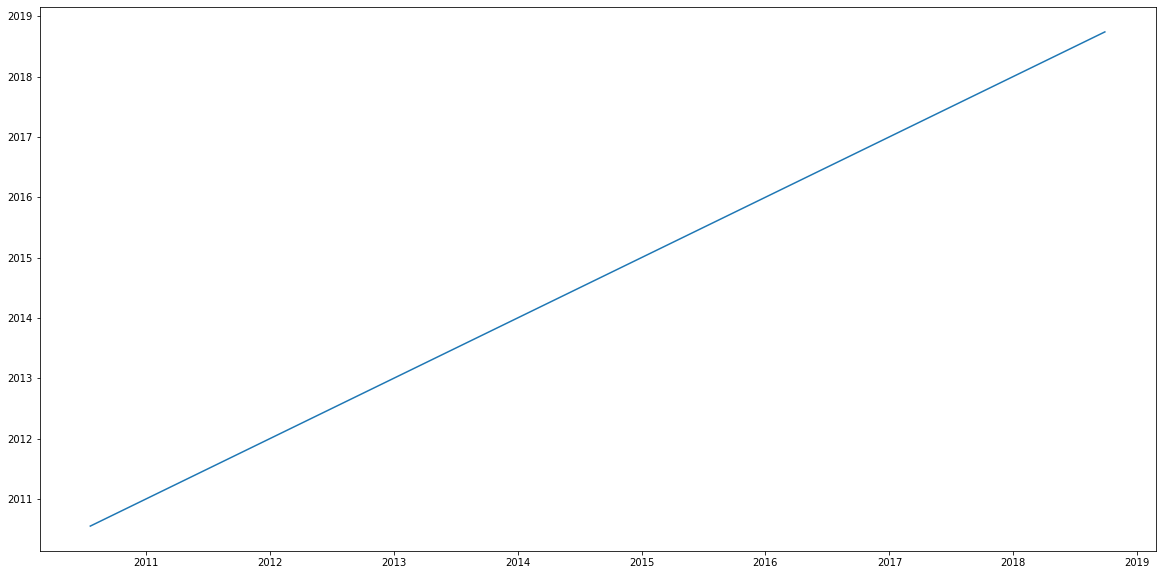

In [38]:
#Analyze the closing prices from dataframe:
data_set["Turnover (Lacs)"]=pd.to_datetime(data_set.Date)
data_set.index=data_set['Turnover (Lacs)']
#data_set.head()

plt.figure(figsize=(20,10))
plt.plot(data_set["Turnover (Lacs)"],label='ClosePriceHist')